# Cell summary stats

In [313]:
import pandas as pd
from gctree.utils import hamming_distance
import seaborn as sns
import matplotlib.pyplot as plt

In [314]:
results = "../nextflow/results/latest"

In [315]:
output_dir = "output/cell-summary"

In [316]:
df = pd.read_csv(f"{results}/merged-results/observed-seqs.csv")
df

,ID_HK,well,HK_key_plate,HK_key_mouse,HK_key_gc,HK_key_node,HK_key_cell_type,aa_substitutions_IMGT,aa_sequence,delta_bind_CGG_FVS_additive,...,fasta_header_HC,fasta_header_LC,fasta_seq_HC,fasta_seq_LC,partis_sequence_HC,partis_sequence_LC,seq_aa_HC,seq_aa_LC,seq_nt_HC,seq_nt_LC
0,210923P01B01HK,B01,18,1,20,LB,GC,Y38(H)F L50(H)F S57(H)G G63(H)D S64(H)T A105(H...,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGFWNWIRKFPGNKFE...,-0.70146,...,PR-1-1.210923.P01.B01.H.R.1-365,PR-1-1.210923.P03.B01.K.R.1-550,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GTGTTGATGGAGACATTGTGATGACTCAGTCTCAAAAATTCATGTC...,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGFWNWIRKFPGNKFE...,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKA...,gaggtgcagcttcaggagtcaggacctagcctcgtgaaaccttctc...,gacattgtgatgactcagtctcaaaaattcatgtccacatcagtag...
1,210923P01B03HK,B03,18,1,20,LB,GC,L50(H)F A105(H)G G70(L)E D74(L)A N93(L)Y Q105(...,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKFE...,0.72075,...,PR-1-1.210923.P01.B03.H.R.1-467,PR-1-1.210923.P03.B03.K.R.1-263,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GTGTTGATGGAGACATTGTGATGACTCAGTCTCAAAAATTCATGTC...,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKFE...,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKA...,gaggtgcagcttcaggagtcaggacctagcctcgtgaaaccttctc...,gacattgtgatgactcagtctcaaaaattcatgtccacatcagtag...
2,210923P01D01HK,D01,18,1,20,LB,GC,I42(H)N Y42(L)S,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWNRKFPGNKLE...,-0.28262,...,PR-1-1.210923.P01.D01.H.R.1-413,PR-1-1.210923.P03.D01.K.R.1-582,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GTGTTGATGGAGACATTGTGATGACTCAGTCTCAAAAATTCATGTC...,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWNRKFPGNKLE...,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWSQQKPGQSPKA...,gaggtgcagcttcaggagtcaggacctagcctcgtgaaaccttctc...,gacattgtgatgactcagtctcaaaaattcatgtccacatcagtag...
3,210923P01D04HK,D04,18,1,20,LB,GC,L50(H)F A105(H)G S83(L)F,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKFE...,0.30367,...,PR-1-1.210923.P01.D04.H.R.1-477,PR-1-1.210923.P03.D04.K.R.1-425,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GTGTTGATGGAGACATTGTGATGACTCAGTCTCAAAAATTCATGTC...,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKFE...,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKA...,gaggtgcagcttcaggagtcaggacctagcctcgtgaaaccttctc...,gacattgtgatgactcagtctcaaaaattcatgtccacatcagtag...
4,210923P01D07HK,D07,18,1,20,LB,GC,I30(H)F S57(H)N K51(L)E,EVQLQESGPSLVKPSQTLSLTCSVTGDSFTSGYWNWIRKFPGNKLE...,-0.57813,...,PR-1-1.210923.P01.D07.H.R.1-433,PR-1-1.210923.P01.D07.K.R.1-81,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GTGTTGATGGAGACATTGTGATGACTCAGTCTCAAAAATTCATGTC...,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,EVQLQESGPSLVKPSQTLSLTCSVTGDSFTSGYWNWIRKFPGNKLE...,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPEA...,gaggtgcagcttcaggagtcaggacctagcctcgtgaaaccttctc...,gacattgtgatgactcagtctcaaaaattcatgtccacatcagtag...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6786,211203P14H06HK,H06,77,8,84,RP,GC,D28(H)A S57(H)N S64(H)R T65(H)N Y67(H)F K72(H)...,EVQLQESGPSLVKPSQTLSLTCSVTGASITSGYWNWIRKFPGNKLE...,3.10817,...,PR-1-6.211203.P14.H06.H.R.1-58,PR-1-6.211203.P14.H06.K.R.1-431,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GTGTTGATGGAGACATTGTGATGACTCAGTCTCAAAAATTCATGTC...,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,EVQLQESGPSLVKPSQTLSLTCSVTGASITSGYWNWIRKFPGNKLE...,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWFQQKAGQSPKA...,gaggtgcagcttcaggagtcaggacctagcctcgtgaaaccttctc...,gacattgtgatgactcagtctcaaaaattcatgtccacatcagtag...
6787,211203P14H07HK,H07,77,8,84,RP,GC,D28(H)A S5

Filter to GC B cells from 20-day mice only

In [317]:
df = df.drop(index=df.query("(HK_key_mouse > 6) | (HK_key_cell_type != 'GC')").index)

Note: the following should instead be pulled form a file

In [318]:
naive = ("GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCT"
                   "CAGACTCTGTCCCTCACCTGTTCTGTCACTGGCGACTCCATCACCAGTGGTTACTGGAACTGGA"
                   "TCCGGAAATTCCCAGGGAATAAACTTGAGTACATGGGGTACATAAGCTACAGTGGTAGCACTTA"
                   "CTACAATCCATCTCTCAAAAGTCGAATCTCCATCACTCGAGACACATCCAAGAACCAGTACTAC"
                   "CTGCAGTTGAATTCTGTGACTACTGAGGACACAGCCACATATTACTGTGCAAGGGACTTCGATG"
                   "TCTGGGGCGCAGGGACCACGGTCACCGTCTCCTCAGACATTGTGATGACtCAGTCTCAAAAATT"
                   "CATGTCCACATCAGTAGGAGACAGGGTCAGCGTCACCTGCAAGGCCAGTCAGAATGTGGGTACT"
                   "AATGTAGCCTGGTATCAACAGAAACCAGGGCAATCTCCTAAAGCACTGATTTACTCGGCATCCT"
                   "ACAGGTACAGTGGAGTCCCTGATCGCTTCACAGGCAGTGGATCTGGGACAGATTTCACTCTCAC"
                   "CATCAGCAATGTGCAGTCTGAAGACTTGGCAGAGTATTTCTGTCAGCAATATAACAGCTATCCT"
                   "CTCACGTTCGGCTCGGGGACtAAGCTaGAAATAAAA").lower()

igk_idx = 336
naive_HC = naive[:igk_idx]
naive_LC = naive[igk_idx:]

## SHM in heavy and light chains

In [319]:
df["SHM (Igh)"] = [hamming_distance(seq, naive_HC) for seq in df.seq_nt_HC]
df["SHM (Igk)"] = [hamming_distance(seq, naive_LC) for seq in df.seq_nt_LC]
df["SHM (Igh + Igk)"] = df["SHM (Igh)"] + df["SHM (Igk)"]

In [320]:
df[["SHM (Igh)", "SHM (Igk)", "SHM (Igh + Igk)"]].describe()

,SHM (Igh),SHM (Igk),SHM (Igh + Igk)
count,4986.000000,4986.000000,4986.000000
mean,3.194545,3.730846,6.925391
std,1.973612,1.960533,2.550050
min,0.000000,0.000000,0.000000
25%,2.000000,2.000000,5.000000
50%,3.000000,4.000000,7.000000
75%,4.000000,5.000000,8.000000
max,12.000000,14.000000,19.000000


In [321]:
df.rename(columns={"HK_key_mouse": "mouse"}, inplace=True)
df["GC"] = df.HK_key_gc.astype(str).str.cat(df.HK_key_node, sep="-")

df.sort_values("mouse", inplace=True)

In [322]:
groups = df.groupby("GC")
groups_df = groups.agg({"mouse": "first"})
groups_df["number of cells"] = groups.size()

len(groups_df)

67

In [323]:
groups_df.describe()

,mouse,number of cells
count,67.000000,67.000000
mean,2.776119,74.417910
std,1.505756,15.220749
min,1.000000,25.000000
25%,1.500000,70.000000
50%,3.000000,78.000000
75%,4.000000,84.000000
max,6.000000,94.000000


Check number of cells in two ways

In [324]:
groups_df["number of cells"].sum(), len(df)

(4986, 4986)

### Distribution of cell counts in each GC

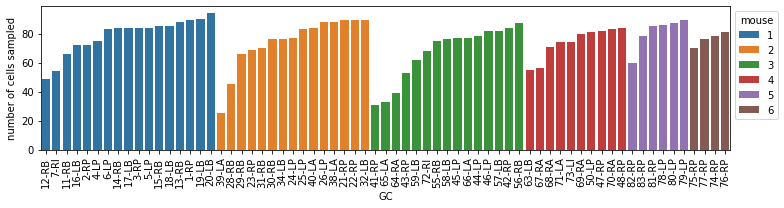

In [325]:
order = groups_df.sort_values(["mouse", "number of cells"]).index

plt.figure(figsize=(11, 3))
ax = sns.barplot(x=groups.GC.first(),
                 y=pd.Series(groups.size(), name="number of cells sampled"),
                 hue=groups.mouse.first(), dodge=False, order=order, linewidth=1)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.xlabel("GC")
plt.tight_layout()
plt.savefig(f"{output_dir}/ncells-violin.pdf")
plt.show()

### Distribution of total SHM

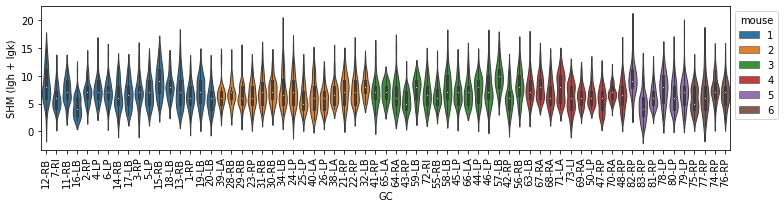

In [326]:
plt.figure(figsize=(11, 3))
ax = sns.violinplot(data=df, x="GC", y="SHM (Igh + Igk)", hue="mouse", dodge=False, order=order, linewidth=1)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.xlabel("GC")
plt.tight_layout()
plt.savefig(f"{output_dir}/shm-violin.pdf")
plt.show()

### Heavy Vs light SHM

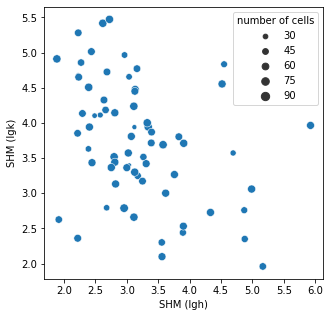

In [327]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x=groups["SHM (Igh)"].mean(), y=groups["SHM (Igk)"].mean(), size=pd.Series(groups.size(), name="number of cells"))
plt.savefig(f"{output_dir}/scatter.pdf")
plt.show()

Write data to csv file

In [328]:
df.to_csv(f"{output_dir}/data.csv")